<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/naucom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


10.1


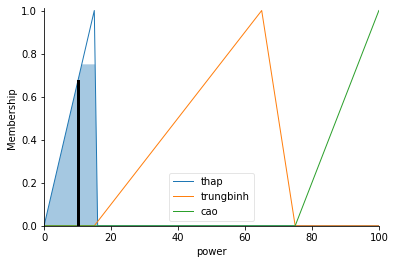

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


time = ctrl.Antecedent(np.arange(0, 181, 1), 'time')
rice = ctrl.Antecedent(np.arange(200, 1501, 1), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')


time['ratnhanh'] = fuzz.trimf(time.universe,[8,8,15])
time['nhanh'] = fuzz.trimf(time.universe,[15,15,25])
time['binhthuong'] = fuzz.trimf(time.universe,[25,40,40])
time['cham'] = fuzz.trimf(time.universe,[40,100,100])
time['ratcham'] = fuzz.trimf(time.universe,[100,180,180])

rice['ratit'] = fuzz.trimf(rice.universe,[200,200,500])
rice['it'] = fuzz.trimf(rice.universe,[500,500,700])
rice['binhthuong'] = fuzz.trimf(rice.universe,[700,1000,1000])
rice['nhieu'] = fuzz.trimf(rice.universe,[1000,1200,1200])
rice['ratnhieu'] = fuzz.trimf(rice.universe,[1200,1500,1500])



power['thap'] = fuzz.trimf(power.universe,[0,15,15])
power['trungbinh'] = fuzz.trimf(power.universe,[15,65,75])
power['cao'] = fuzz.trimf(power.universe,[75,100,100])

rule1 = ctrl.Rule(time['ratnhanh'] & rice['ratit'], power['trungbinh'])
rule2 = ctrl.Rule(time['ratnhanh'] & rice['it'], power['trungbinh'])
rule3 = ctrl.Rule(time['ratnhanh'] & rice['binhthuong'], power['cao'])
rule4 = ctrl.Rule(time['ratnhanh'] & rice['nhieu'], power['cao'])
rule5 = ctrl.Rule(time['ratnhanh'] & rice['ratnhieu'], power['cao'])

rule6 = ctrl.Rule(time['nhanh'] & rice['ratit'], power['trungbinh'])
rule7 = ctrl.Rule(time['nhanh'] & rice['it'], power['trungbinh'])
rule8 = ctrl.Rule(time['nhanh'] & rice['binhthuong'], power['trungbinh'])
rule9 = ctrl.Rule(time['nhanh'] & rice['nhieu'], power['cao'])
rule10 = ctrl.Rule(time['nhanh'] & rice['ratnhieu'], power['cao'])

rule11 = ctrl.Rule(time['binhthuong'] & rice['ratit'], power['trungbinh'])
rule12 = ctrl.Rule(time['binhthuong'] & rice['it'], power['trungbinh'])
rule13 = ctrl.Rule(time['binhthuong'] & rice['binhthuong'], power['trungbinh'])
rule14 = ctrl.Rule(time['binhthuong'] & rice['nhieu'], power['trungbinh'])
rule15 = ctrl.Rule(time['binhthuong'] & rice['ratnhieu'], power['trungbinh'])


rule16 = ctrl.Rule(time['cham'] & rice['ratit'], power['thap'])
rule17 = ctrl.Rule(time['cham'] & rice['it'], power['thap'])
rule18 = ctrl.Rule(time['cham'] & rice['binhthuong'], power['thap'])
rule19 = ctrl.Rule(time['cham'] & rice['nhieu'], power['thap'])
rule20 = ctrl.Rule(time['cham'] & rice['ratnhieu'], power['thap'])


rule21 = ctrl.Rule(time['ratcham'] & rice['ratit'], power['thap'])
rule22 = ctrl.Rule(time['ratcham'] & rice['it'], power['thap'])
rule23 = ctrl.Rule(time['ratcham'] & rice['binhthuong'], power['thap'])
rule24 = ctrl.Rule(time['ratcham'] & rice['nhieu'], power['thap'])
rule25 = ctrl.Rule(time['ratcham'] & rice['ratnhieu'], power['thap'])

pow_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8 , rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25 ])


pow = ctrl.ControlSystemSimulation(pow_ctrl)

pow.input['time']=160
pow.input['rice']=1000

pow.compute()

print(pow.output['power']) 

power.view(sim=pow)

























